In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt

Text(0.5,1,'Testing data')

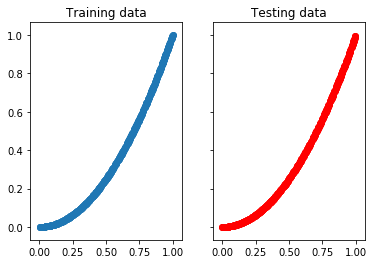

In [39]:
datacount = 1000 

#linearly spaced 1000 values between 0 and 1
trainx = np.linspace(0, 1, 1000)                      #trainx = np.random.rand(datacount)
trainy = np.asarray([v**2 for v in trainx])


#shuffle the X for a good train-test distribution
p = np.random.permutation(datacount)
trainx = trainx[p]
trainy = trainy[p]

    
# Divide data by half for testing and training
train_X = np.asarray(trainx[0:int(datacount/2)]) 
train_Y = np.asarray(trainy[0:int(datacount/2)])
test_X  = np.asarray(trainx[int(datacount/2):])
test_Y  = np.asarray(trainy[int(datacount/2):])

#plot the train and test data
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(train_X,train_Y)
ax1.set_title('Training data')
ax2.scatter(test_X,test_Y, color='r')
ax2.set_title('Testing data')

In [49]:
#lets first create the tensorflow environment we will work in
rng = np.random
learning_rate = 0.01
n_samples = train_X.shape[0]


X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(rng.randn(1,64)*2, name="weight1",dtype="float")
b1 = tf.Variable(rng.randn(64)*2, name="bias1",dtype="float")

fc1 = tf.nn.relu(tf.matmul(X, W1) + b1)       #out1 = tf.add(tf.multiply(X, W1), b1)


#W2 = tf.Variable(rng.randn(16,32), name="weight2",dtype="float")
#b2 = tf.Variable(rng.randn(32), name="bias2",dtype="float")

#fc2 = tf.nn.relu(tf.matmul(fc1, W2) + b2)

W3 = tf.Variable(rng.randn(64,1)*2, name="weight3",dtype="float")
b3 = tf.Variable(rng.randn(1)*2, name="bias3",dtype="float")

pred = tf.matmul(fc1, W3) + b3                  #pred = tf.nn.relu(tf.matmul(X, W1) + b1)


cost      = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Now, after going over my last post, I realized I could add some re-usability to my code. Let's add a training function which we can use later on to try different models and data. By converting this to a function, this will reduce the copy-paste in my code.

In [50]:
def trainingFunction(sess,optimizer,cost,train_X,train_Y,display_step,training_epochs):
    
    loss_history = [] 
    data_count_train = train_X.shape[0] 
    
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x.reshape([1,1]), Y: y.reshape([1,1])})

        c = sess.run(cost, feed_dict={X: train_X.reshape([int(data_count_train),1]), Y:train_Y.reshape([int(data_count_train),1])})     
        loss_history.append(c)


        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X.reshape([int(datacount/2),1]), Y: train_Y.reshape([int(datacount/2),1])})
    print("Training cost=", training_cost, '\n')
    
    return loss_history
    

Epoch: 0001 cost= 0.396460056
Epoch: 0051 cost= 0.044932947
Epoch: 0101 cost= 0.009715630
Epoch: 0151 cost= 0.002805076
Epoch: 0201 cost= 0.001466432
Epoch: 0251 cost= 0.001148779
Epoch: 0301 cost= 0.001012120
Epoch: 0351 cost= 0.000917512
Epoch: 0401 cost= 0.000840088
Epoch: 0451 cost= 0.000772535
Epoch: 0501 cost= 0.000711109
Epoch: 0551 cost= 0.000656351
Epoch: 0601 cost= 0.000610686
Epoch: 0651 cost= 0.000571710
Epoch: 0701 cost= 0.000536838
Epoch: 0751 cost= 0.000506303
Epoch: 0801 cost= 0.000478472
Epoch: 0851 cost= 0.000453880
Epoch: 0901 cost= 0.000432524
Epoch: 0951 cost= 0.000413925
Optimization Finished!
Training cost= 0.00039697773 



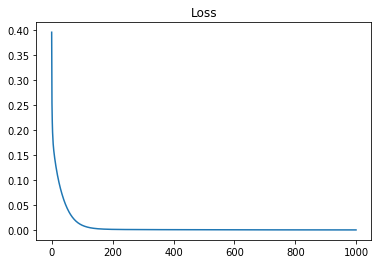

In [51]:
training_epochs = 1000
display_step = 50

#refresh the session and initialize the weights
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

#use the training function we created to train the model
loss_history = trainingFunction(sess,optimizer,cost,train_X,train_Y,display_step,training_epochs)

plt.plot(loss_history)
plt.title('Loss')
plt.show()


Text(0.5,1,'Testing predicted')

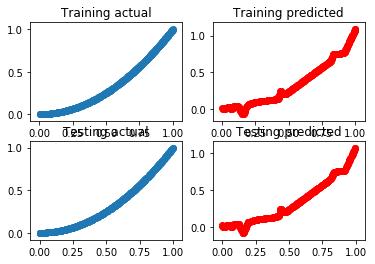

In [57]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)

y_res = sess.run(pred, feed_dict={X: train_X.reshape([int(datacount/2),1])})
y_res_test = sess.run(pred, feed_dict={X: test_X.reshape([int(datacount/2),1])})

ax1.scatter(train_X,train_Y)
ax1.set_title('Training actual')
ax2.scatter(train_X,y_res, color='r')
ax2.set_title('Training predicted')

ax3.scatter(test_X,test_Y)
ax3.set_title('Testing actual')
ax4.scatter(test_X,y_res_test, color='r')
ax4.set_title('Testing predicted')


In [59]:
my_values = np.asarray([0 , 0.12 , 0.5 , 0.111 , 1, 1.2 , 1.5 , 2])

y_res = sess.run(pred, feed_dict={X: my_values.reshape([8,1])})

print(y_res)

[[0.01682734]
 [0.03988433]
 [0.2329185 ]
 [0.0385139 ]
 [1.0893276 ]
 [1.1905015 ]
 [2.1263425 ]
 [5.4642086 ]]
